# Tutorial Geospatial Data

## Part #2 Geometries and Spatial Relationships

In this chapter you learn how to create a GeoDataFrame. Another aspect of geospatial data is how they relate to each other in space. Thus, you will learn the different spatial relationships, and how to use them in Python to query the data or to perform spatial joins.

### Construct a GeoDataFrame from a DataFrame

You can construct a GeoDataFrame from a DataFrame as long as you have the required pieces in place: a geometry column and the Coordinate Reference System (CRS).

To create a geometry column, first build a represenation of the geometry and then use a specific constructor from the geometry module in the Shapely package. **Shapely** is a Python package that provides methods for creating and working with points, lines and polygons.

In [126]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# import geospatial libraries
import geopandas as gpd
from shapely.geometry import Point

Let's use a new dataset with restaurants in Berlin:

In [127]:
restaurants = pd.read_csv('Data/Cleansed_Data/Berlin_Restaurants')
restaurants.head(2)

,id,lat,lng,name,subCategory
0,91911,52.517114,13.46176,Casablanca,Falafel Restaurant
1,91920,52.506012,13.32805,Hotel Savoy Berlin,Hotel


In [128]:
type(restaurants)

pandas.core.frame.DataFrame

*(This dataset is sourced from [tour-pedia](http://tour-pedia.org/about/datasets.html).)*

***Creating Point Geometry***

Next, let's create a Point Geometry Series. <br> The lambda function we apply combines longitude and latitude to create a tuple and then constructs a Point Geometry from the tuple. A different way to create a geometry using `zip` is also provided:

In [129]:
# create a point geometry Series: option 1
geometry = restaurants.apply(lambda x: Point((x.lng, x.lat)), axis=1)

# option 2
#geometry = [Point(xy) for xy in zip(restaurants['lng'], restaurants['lat'])]

Now that we have our geometry Series, the DataFrame is ready to be used as a GeoDataFrame. 

***Creating GeoDataFrame***

To construct a GeoDataFrame, we use the GeoDataFrame constructor, passing it 
- the `restaurants` DataFrame, 
- the `crs` to use and 
- the `geometry` to use. 

Here we create an object called `crs` and set it to use the *EPSG:4326* CRS. We specify the geometry Series we just created as the new GeoDataFrame's `geometry` column:

In [130]:
crs = {'init':'epsg:4326'}
restaurants_geodf = gpd.GeoDataFrame(restaurants, crs=crs, geometry=geometry)
restaurants_geodf.head(2)

,id,lat,lng,name,subCategory,geometry
0,91911,52.517114,13.46176,Casablanca,Falafel Restaurant,POINT (13.46175956167 52.51711388739101)
1,91920,52.506012,13.32805,Hotel Savoy Berlin,Hotel,POINT (13.32805032307 52.506011569827)


In [131]:
type(restaurants_geodf)

geopandas.geodataframe.GeoDataFrame

Comparing both dataframes, we see it's almost identical, only the datatype has changed from a DataFrame to a GeoDataFrame, and the `geometry` column is added.

***Converting CRS***

Notice that the GeoDataFrame's geometry uses decimal degrees to measure distances from the reference points. Remembering the last tutorial, we can convert the geometry - to measure distance in meters - using the `.to_crs()` method. 

Let's convert the crs to *EPSG:3857* with the resulting measurements in meters. 

Note that the original latitude and longitude columns remain in decimal degree units. `.to_crs()` only changes the geometry column.

In [132]:
# convert geometry from decimal degrees to meters
restaurants_geodf.geometry = restaurants_geodf.geometry.to_crs(epsg=3857)
restaurants_geodf[10:16]

,id,lat,lng,name,subCategory,geometry
10,92052,52.502578,13.416510,KuchenKaiser,German Restaurant,POINT (1493519.066988837 6891513.247496091)
11,92056,52.477287,13.320738,Straßenbahn,Pub,POINT (1482857.806712955 6886889.374957205)
12,92060,52.490184,13.353222,Tee Tea Thé,Tea Room,POINT (1486473.873489538 6889246.948290107)
13,92064,52.498880,13.446037,FABRIK-CAFÉ,Café,POINT (1496805.992027516 6890836.920768892)
14,92079,52.504206,13.417475,Die Henne,German Restaurant,POINT (1493626.46246758 6891810.82448681)
15,92083,52.523604,13.306436,Pasticceria e Rosticceria Italiana,Café,POINT (1481265.710321542 6895359.091989944)


Let's extract values of the geometry column using the `.loc` attribute of a dataframe:

In [133]:
kuchen_kaiser = restaurants_geodf.loc[10, 'geometry']
tee_tea = restaurants_geodf.loc[12, 'geometry']
die_henne = restaurants_geodf.loc[14, 'geometry']

If we print this value, we can see that it's a Point geometry:

In [134]:
print(kuchen_kaiser)

POINT (1493519.066988837 6891513.247496091)


And when checking the type of this value, we see it's a Shapely Point object:

In [135]:
type(kuchen_kaiser)

shapely.geometry.point.Point

The geometry column in a GeoDataFrame thus consists of Shapely objects!

But geometries can also created manually. Here we create a Point geometry for the Brandenburg Gate with coordinates 13.377704 (longitude) and 52.516275 (latitude):

In [136]:
brandenburg_gate = Point(13.377704, 52.516275)
print(brandenburg_gate)

POINT (13.377704 52.516275)


### Spatial Methods and Relationships in Shapely

Shapely geometries come with spatial built-in **methods**. Before we look at some examples of such methods, let's load again the `berlin_districts` dataset and define alle 12 districts:

In [138]:
berlin_districs = gpd.read_file('Data/Cleansed_Data/Berlin_Districts.shp')
berlin_districs.crs

{'init': 'epsg:4326'}

In [139]:
reinickendorf = berlin_districs.loc[0, 'geometry']
char_wilm = berlin_districs.loc[1, 'geometry']
trep_koep = berlin_districs.loc[2, 'geometry']
pankow = berlin_districs.loc[3, 'geometry']
neukoelln = berlin_districs.loc[4, 'geometry']
lichtenberg = berlin_districs.loc[5, 'geometry']
marz_heller = berlin_districs.loc[6, 'geometry']
spandau = berlin_districs.loc[7, 'geometry']
steg_zehl = berlin_districs.loc[8, 'geometry']
mitte = berlin_districs.loc[9, 'geometry']
fried_kreuz = berlin_districs.loc[10, 'geometry']
temp_schoen = berlin_districs.loc[11, 'geometry']

In [140]:
# the area of a polygon geometry
mitte.area

0.005217527665220497

In [141]:
# the distance method calculates the distance between two geometries
die_henne.distance(kuchen_kaiser)

316.36348439708365

*We will see in the next chapter in which units this is expressed!!??**

Apart from methods for a single object, Shapely also allows us to explore spatial **relationships** between geometries. In our first example, we quickly put some of our geometries in a GeoSeries and plot that. *(We take this way since Shapely has no method to visualize multiple geometries.)*:

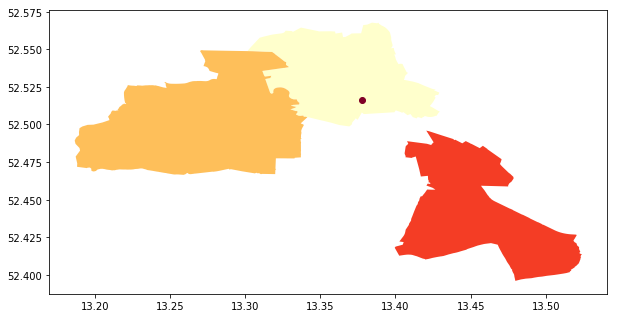

In [142]:
gpd.GeoSeries([mitte, char_wilm, neukoelln, brandenburg_gate]).plot(cmap='YlOrRd', figsize=(10,8));

We see that the Brandenburg Gate is located in the Mitte district (in bright yellow). 

Mitte and Charlottenburg (in dark yellow) are neighbors, while Mitte and Neukölln (in bright red) are not.

Now let's try methods that translate what we've just seen into code:

In [143]:
# contains-method to check whether Mitte contains the famous landmark
mitte.contains(brandenburg_gate)

True

In [144]:
# contains-method to check whether Neukölln contains the famous landmark
neukoelln.contains(brandenburg_gate)

False

In [145]:
# now the same with the within-method --> the order changes!
brandenburg_gate.within(mitte)

True

In [146]:
# touches-method
mitte.touches(char_wilm)

True

In [24]:
#line.intersects(france)

### Spatial Relationships in GeoPandas

We just learned about certain spatial relationships between two individual geometry objects. The GeoDataFrame yet has similar methods to apply to *all* of its geometries.

In the next example, we're checking which restaurants are within the polygon of the Mitte district:

In [147]:
restaurants_geodf.crs

{'init': 'epsg:3857', 'no_defs': True}

In [148]:
berlin_districs.crs

{'init': 'epsg:4326'}

In [149]:
# convert geometry from meters to decimal degrees 
restaurants_geodf.geometry = restaurants_geodf.geometry.to_crs(epsg=4326)
restaurants_geodf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [150]:
restaurants_geodf.within(mitte).tail()

3976     True
3977    False
3978    False
3979    False
3980    False
dtype: bool

The result of this operation is a Boolean Series that can directly be used as a mask to filter the original dataframe:

In [151]:
restaurants_geodf[restaurants_geodf.within(mitte)].shape[0]

477

For our dataset, there are 477 restaurants located in Mitte.

In [ ]:
#rivers = geopandas.read_file("ne_50m_rivers_lake_centerlines.shp")
#rivers.head()

Which states does the Rhine flow through? To answer this question, we can check which states cross resp. *intersect* the river.

We first extract the Rhine and then create a mask

In [ ]:
#amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()
#mask = countries.intersects(amazon)

If we use the mask on the countries dataset, we have the answer

In [ ]:
#countris[mask]

contains, within, intersects  the most used ones!, but not the only ones. Browse through shapely documentations. Almost all methods available on indivual geometries has its equivalent method on a GeoDataFrame where it is automatically applied element-wise

In [98]:
#soil = gpd.read_file('Data/Raw_Data/BGR__Bodenarten/BGR__Bodenarten.shp')
#soil.head()

In [99]:
#soil.BODART_GR.value_counts()

In [100]:
#soil.plot(column='BODART_GR');

In [101]:
#soil.crs

In [102]:
# convert geometry from decimal degrees to meters
#soil.geometry = soil.geometry.to_crs(epsg=3857)

In [103]:
#leg_kwds={'title':'Soil Types in Germany', 
          #'loc': 'upper left', 
          #'bbox_to_anchor':(1, 1.03), 
          #'ncol':2}

#soil.plot(column='BODART_GR', cmap='Set1_r', figsize=(10,10), legend=True, legend_kwds=leg_kwds)

# remove the axis
#plt.axis('off');

### Spatial Joins

It would be interesting to know for each restaurant in which district it is located in. Unfortunately, the districts' names are in another GeoDataFrame. So we need to combine - or: join - both datasets. Joining on location is called a *spatial join'.

To spatially join two GeoDataFrames, GeoPandas provides the `.sjoin()` method. It takes an argument `op` which is short for operation to specify the type of spatial join:

```python
gpd.sjoin(first_gdf, second_gdf, op = <operation>)
```

The first_gdf is the GeoDataFrame we want to add information to. The second_gdf is the GeoDataFrame that contains the information we want to add. Finally we specify which spatial operation we want to use. The operation can be one of three types: *intersects*, *contains*, or *within*

We use *within* as we want GeoPandas check whether or not rows in the restaurants dataset (left GeoDataFrame) are within the rows of the districts dataset(right GeoDataFrame). Note how the order of the arguments is important here!

In [152]:
restaurants_geodf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [153]:
berlin_districs.crs

{'init': 'epsg:4326'}

In [154]:
joined = gpd.sjoin(restaurants_geodf, berlin_districs, op = 'within')
joined.head(3)

,id,lat,lng,name,subCategory,geometry,index_right,OBJECTID,DISTRICT,Shape__Are,Shape__Len,POPULATION
0,91911,52.517114,13.461760,Casablanca,Falafel Restaurant,POINT (13.46175956166999 52.51711388739101),10,11,Friedrichshain-Kreuzberg,5.496101e+07,53758.825032,285963
2,91947,52.511193,13.449347,Upstalsboom Hotel,Hotel,POINT (13.44934701919601 52.511193329824),10,11,Friedrichshain-Kreuzberg,5.496101e+07,53758.825032,285963
5,92007,52.504890,13.385203,relexa hotel Stuttgarter Hof,Hotel,POINT (13.385203007038 52.50488973443598),10,11,Friedrichshain-Kreuzberg,5.496101e+07,53758.825032,285963


And here we've chained several functions to group, count, and sort the joined df to see how many restaurants are within each district:

In [160]:
# first subset joined df     # groupby district  # count restaurants per district # sort descending
joined[['name', 'DISTRICT']].groupby('DISTRICT').agg('count').sort_values('name', ascending=False)

,name
DISTRICT,
Mitte,477
Charlottenburg-Wilmersdorf,466
Pankow,424
Steglitz-Zehlendorf,388
Tempelhof-Schöneberg,372
Treptow-Köpenick,318
Neukölln,312
Reinickendorf,284
Friedrichshain-Kreuzberg,265


***Wanna more?***

- Read the [GeoPandas Docs](http://geopandas.org/index.html)
- Read the [Shapely Docs](https://shapely.readthedocs.io/en/stable/manual.html#)
- Read this [article](https://medium.com/@shakasom/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea) to learn more about????